# Clustering 

## Importación de librerías

In [1]:
# Dataframes 
import pandas as pd
import numpy as np

# Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Reduccion de dimensionalidad
from sklearn.manifold import TSNE

# Clustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# Evaluacion de clusters
from sklearn.metrics import silhouette_score
from sklearn import metrics

# Dendograma
from scipy.cluster.hierarchy import dendrogram


## Extracción y manipulación de datos

In [2]:
## Abrir datos
DataX = open("./source/trainData.txt","r")
DataY = open("./source/trainClasses.txt","r")
DatatestX = open("./source/testData.txt","r")
DatatestY = open("./source/testClasses.txt","r")

## Parseo de datos
def splitFile(File,List):
    for line in File:
        line = line.replace("\n","")
        List.append(line)
    

## Convertimos cada línea de nuestros archivos en una entrada de un vector
trainX= []
trainY= []
testX = []
testY = []

## Generamos la lista de oraciones y clases
splitFile(DataX,trainX)
splitFile(DataY,trainY)
splitFile(DatatestX,testX)
splitFile(DatatestY,testY)

## Juntar datos
xData = trainX + testX
yData = trainY + testY


DataX.close()
DataY.close()
DatatestX.close()
DatatestY.close()

In [3]:
## Creamos un Vectorizador
vectorizer = CountVectorizer()

## Vectorizamos el test con el mismo vectorizador entrenado para que tengan las mismas dimensiones 
xVec = vectorizer.fit_transform(xData)
xCount = pd.DataFrame(xVec.todense(), columns = vectorizer.get_feature_names())
xCount

,000,05068,094,0x156d848,0x1577a08,0x15b6280,0x15bd560,0x15c0af0,0x15c3fc0,0x1602fd8,...,zn,zn2,znso4,znta,zntr,zrap,zrar,zras,zur,µm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Para realizar el t-SNE utilizamos la funcion TSNE, la cual ajusta el modelo.
tsne = TSNE(random_state = 9, n_components = 200, method = 'exact')  

## Una vez creado el modelo, utilizamos el metodo .fit_transform para transformar los datos escalados
X_embedded = tsne.fit_transform(xCount)


KeyboardInterrupt: 

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

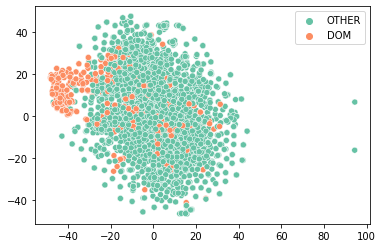

In [27]:
palette = sns.color_palette("Set2", 200)  # Creamos una paleta con base en la paleta husl de 5 colores, debido a que tenemos 5 tipos de cancer (5 clases)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = yData, legend = 'full', palette = palette)  # Graficamos las primeras dos dimensiones del dataset reducido y utilizamos la paleta creada


# Clustering K-Means

In [28]:
## Crear función para usar el método de K-Means
def clustering_kmeans(n, data):  
    np.random.seed(9)
    ## Creamos el modelo con la funcion KMeans
    kmeans = KMeans(n_clusters = n, random_state = 42)
    ## Ajustar el modelo
    kmeans.fit(X = data)
    ## Predicción de clusters
    y_predict = kmeans.predict(X = data)
    ## Crear paleta
    palette = sns.color_palette("husl", n)
    
    ## Retornar valores de modelo, predicción y paleta
    return(kmeans, y_predict, palette)


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

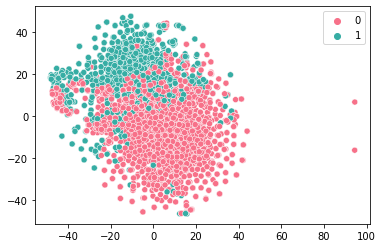

In [29]:
## Obtener modelo y predicciones con la función creada
kmeans, y_predict, palette = clustering_kmeans(2, xCount)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = y_predict, legend = 'full', palette = palette)


In [31]:
## Asignación de clases
class_corr = [[0, 1], ['OTHER', 'DOM']]
classes_num = [0 if i == class_corr[1][0] else 1 if i == class_corr[1][1] else i for i in yData]
classes_num = np.array(classes_num)
classes_num[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [32]:
## Matriz de confusión
pd.crosstab(classes_num, y_predict, dropna = False, rownames = ['True'], colnames = ['Pred'])

Pred,0,1
True,,
0,1360,549
1,180,148


In [33]:
## Visualización de asignación
pd.DataFrame(class_corr).transpose()

,0,1
0,0,OTHER
1,1,DOM


## Evaluación con "silhouette method"

In [38]:
silhouettes = []

## Ajustamos modelos desde k = 2 hasta k = 12
for n in range(2, 12):
    ## Ajustamos el modelo con el valor de k de cada iteracion
    kmeans, y_predict, palette = clustering_kmeans(n, xCount)
    silhouette = silhouette_score(xCount, y_predict)
    silhouettes.append(silhouette)


[0.12437937767861618,
 0.04523831551024292,
 0.0316308791846663,
 0.028510627351501536]

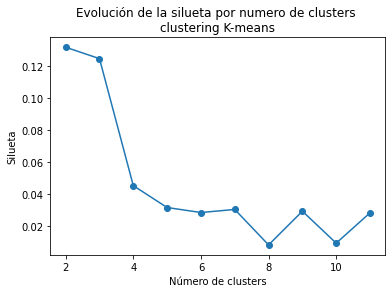

In [40]:
## Graficamos
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 12), silhouettes, marker = 'o')
ax.set_title("Evolución de la silueta por numero de clusters \nclustering K-means")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Silueta');

## Clustering de dimensionalidad

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

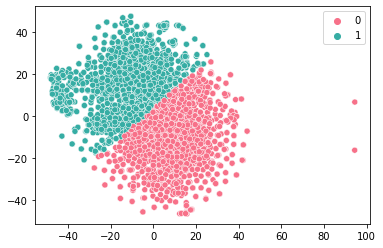

In [43]:
## Obtener modelo y predicciones con la función creada con dimensión reducida

kmeans, y_predict, palette = clustering_kmeans(2, X_embedded)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = y_predict, legend = 'full', palette = palette)

In [47]:
# Creamos funcion que ajuste los modelos de forma automatica
def hierarchical_clustering(data):  # En este caso, no le pasamos al clustering el numero de clusters, solo los datos
    np.random.seed(42)
    hierchclust = AgglomerativeClustering(affinity = 'euclidean', distance_threshold = 0, n_clusters = None)  # El parametro distance_threshold = 0 hace que se forme un cluster por observacion
    y_predict = hierchclust.fit_predict(X = data)  # Predecimos las clases
    nclust = hierchclust.n_clusters_  # Obtenemos el numero de clusters con el metodo .n_clusters_
    return(hierchclust, y_predict, nclust)  # Devolvemos el modelo, las predicciones y el numero de clusters

In [48]:
hierchclust, y_predict, nclust = hierarchical_clustering(X_embedded)
nclust

2237

In [49]:
# Funcion para crear un dendrograma (la encuentran asi en internet :))
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Clustering jerarquico')

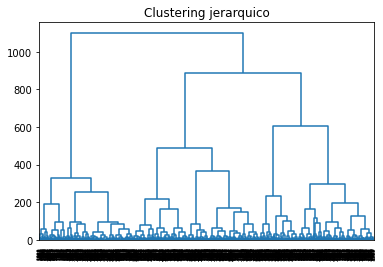

In [52]:
fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 0, ax = ax)  # Graficamos, y especificamos el parametro color_threshold a 0, de este modo, cada observacion es un cluster
ax.set_title("Clustering jerarquico")

Text(0.5, 1.0, 'Clustering jerarquico')

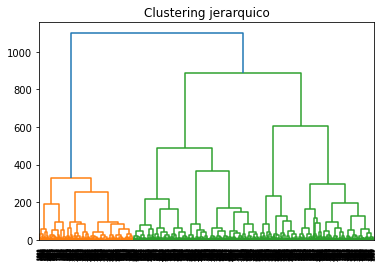

In [53]:
fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 1000, ax = ax)  # Graficamos, y especificamos el parametro color_threshold a 0, de este modo, cada observacion es un cluster
ax.set_title("Clustering jerarquico")

Text(0.5, 1.0, 'Clustering jerarquico')

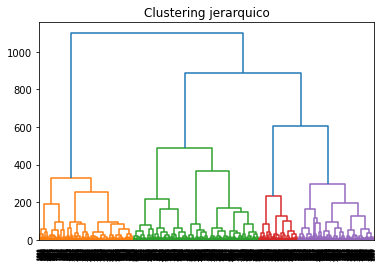

In [54]:
fig, ax = plt.subplots(1, 1)
plot_dendrogram(hierchclust, color_threshold = 570, ax = ax)  
ax.set_title("Clustering jerarquico")

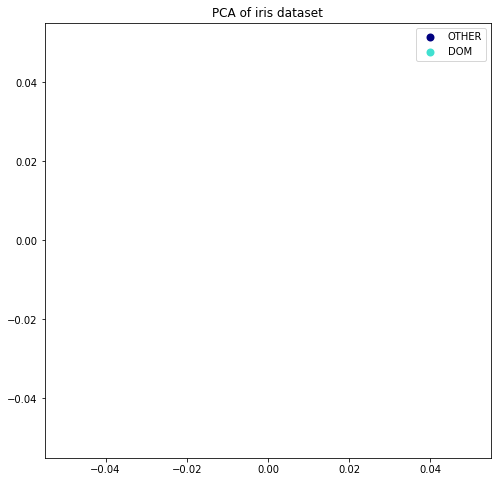

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

X = xCount
y = yData

n_components = 2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


colors = ['navy', 'turquoise']

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, ['DOM', 'OTHER'], set(y)):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, lw=2, label=target_name)
plt.title("PCA of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.axis([-4, 4, -1.5, 1.5])
plt.show()


In [7]:
y = yData
y

['OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'DOM',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'DOM',
 'DOM',
 'OTHER'